# Test di Kolmogorov-Smirnov

Il test serve per determinare quanto un campione è compatibile con una distribuzione teorica.

In [1]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import math

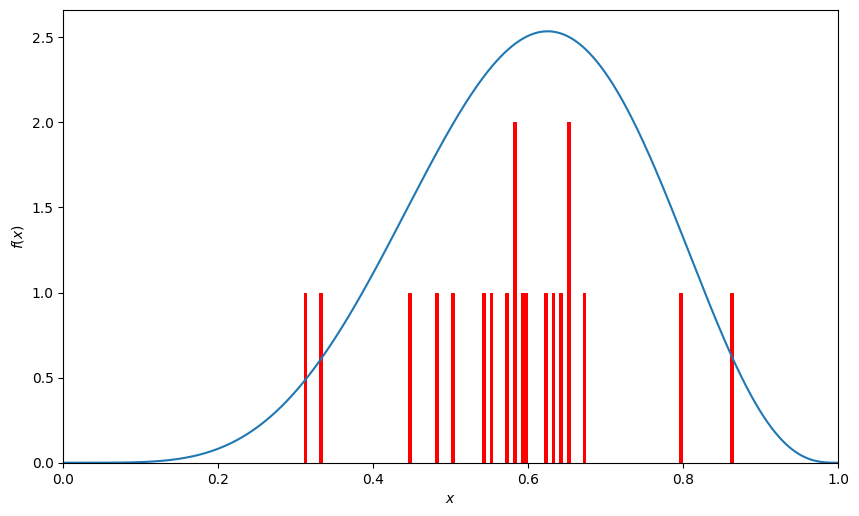

In [2]:
model = beta(6, 4)
sample = model.rvs(20)
xs = np.linspace(0, 1, 1001)
ys = model.pdf(xs)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs,ys)
plt.hist(sample, bins=200, range=(0,1), color='r')
plt.ylim(bottom=0)
plt.xlim(0,1)
plt.xlabel('$x$')
plt.ylabel(r'$f(x)$')
plt.show()

Il test confronta la distribuzione cumulativa della PDF con la distribuzione cumulativa ottenuta come funzione a gradino a partire dal campione considerato:

$\displaystyle F(x) = \int_{-\infty}^x\!\! f(x)\,\mathrm{d}x$

$\displaystyle F_n(x) = \frac{1}{n}\sum_{i=1}^n \theta\,(x-x_i)$

dove $\theta$ è la funzione gradino:

$\displaystyle \theta\,(x) = \left\{
\begin{array}{ccc}
1 & \mathrm{se} & x\ge 0\\
0 & \mathrm{se} & x <0
\end{array}
\right.
$

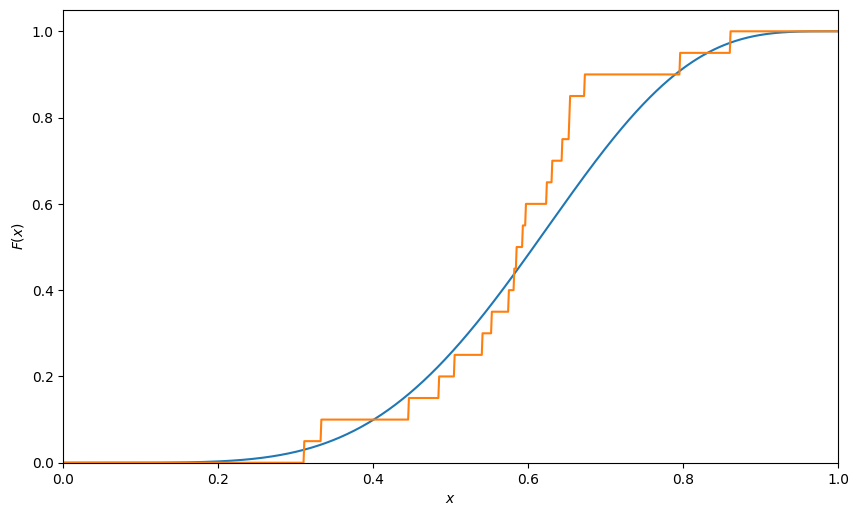

In [3]:
yc = model.cdf(xs)
def samplec(x):
    u, c = np.unique(sample < x, return_counts=True)
    d = dict(zip(u, c))
    return (d[True]/len(sample)) if (True in d.keys()) else 0.0
sc = (np.vectorize(samplec))(xs)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs,yc)
plt.plot(xs,sc)
plt.ylim(0)
plt.xlim(0,1)
plt.xlabel('$x$')
plt.ylabel(r'$F(x)$')
plt.show()

Lo stimatore della consistenza tra il campione e la funzione si ottiene a partire dal valore massimo della discrepanza:

$\displaystyle D_n = \sup_n\left|F_n(x) - F(x)\right|$

La distribuzione di probabilità dello stimatore $K = \sqrt{K}D_n$ tende, per $n\rightarrow \infty$, ad una funzione nota e calcolabole, la cui distribuzione cumulativa è:

$\displaystyle F(k) = P(K\le k) = 1-2\sum_{i=1}^\infty (-1)^{i-1}e^{-i^2k^2} = 
\frac{\sqrt{2\pi}}{k}\sum_{i=1}^\infty e^{-(2i-1)^2\pi^2/8k^2}
$

Soprattutto, è implementata in python come [```kstest```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html).

In [4]:
k = np.abs(yc-sc).max()
print("K =", k)
print("x = ", xs[np.abs(yc-sc)==k])

K = 0.2342019588519163
x =  [0.673]


In [7]:
from scipy import stats
D, p = stats.kstest(sample, model.cdf)
print(D, p)

0.23536441019315002 0.18549264397710785


Il $p$-value permette di rigettare o meno l'ipotesi $H_0$ che la distribuzione segua la funzione $f$.

## Test a due campioni

Si possono anche confrontare due campioni ed ottenere un $p$-value che corrisponde all'ipotesi che i due siano stati estratti dalla stessa distribuzione.

Viene calcolato il massimo della distanza tra le due funzioni a gradino:

$\displaystyle D_{n,m} = \sup_n\left|F_n(x) - F_m(y)\right|$

Asintoticamente, lo statistic:

$\displaystyle \sqrt{\frac{nm}{n+m}}D_{n,m}$

segue la distribuzione di Kolmogorof riportata sopra.

L'implementazione è in [```ks_2samp```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)

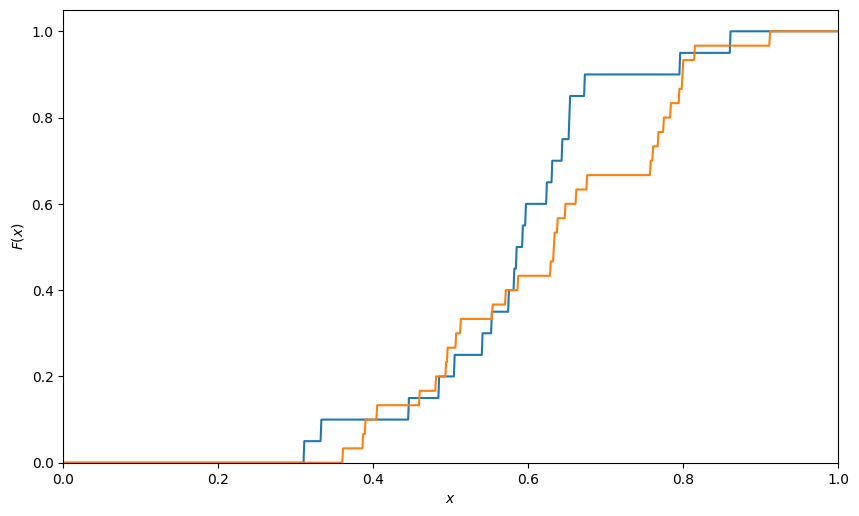

In [13]:
sample1 = model.rvs(30)
yc = model.cdf(xs)
def sample1c(x):
    u, c = np.unique(sample1 < x, return_counts=True)
    d = dict(zip(u, c))
    return (d[True]/len(sample1)) if (True in d.keys()) else 0.0
s1c = (np.vectorize(sample1c))(xs)
plt.figure(figsize=(10,6), dpi=100)
plt.plot(xs,sc)
plt.plot(xs,s1c)
plt.ylim(0)
plt.xlim(0,1)
plt.xlabel('$x$')
plt.ylabel(r'$F(x)$')
plt.show()

In [12]:
D, p = stats.ks_2samp(sample, sample1)
print(D, p)

0.31666666666666665 0.15614190473092637
